In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [3]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [4]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


# Data Analysis

In [5]:
data.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [7]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [8]:
data.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,48204,48204,48204,48204
unique,12,11,38,40575
top,None,Clouds,sky is clear,2013-04-18 22:00:00
freq,48143,15164,11665,6


Text(0.5, 1.0, 'clouds_all')

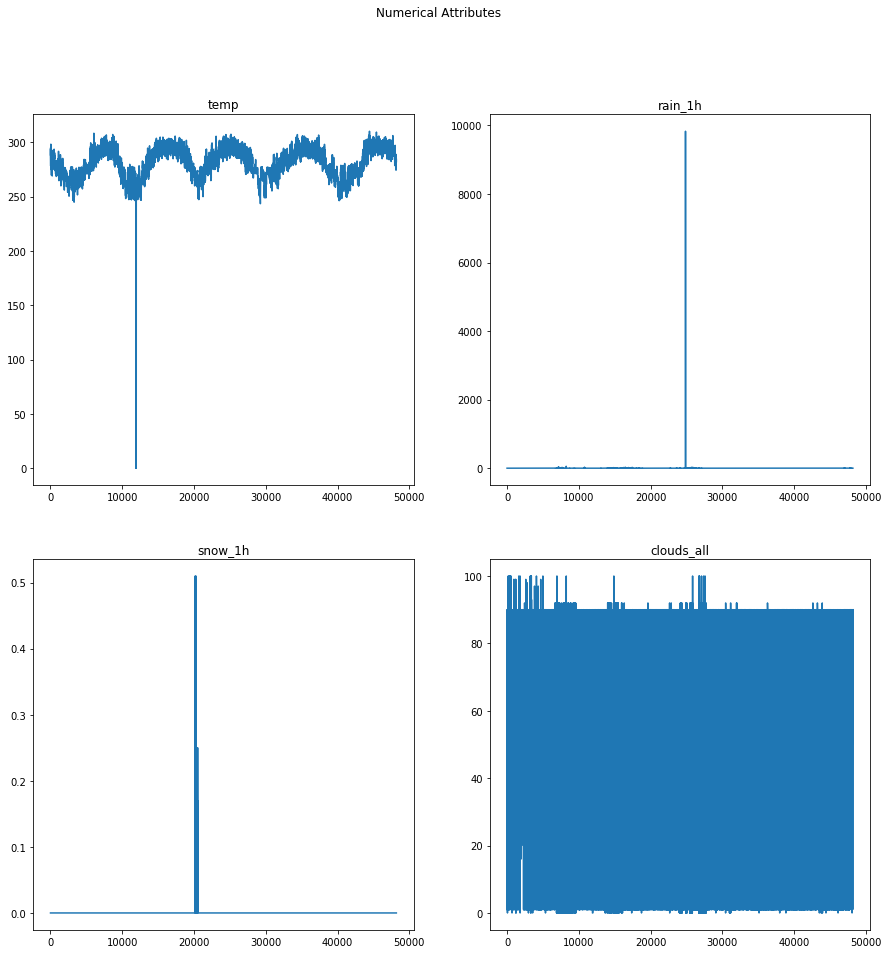

In [9]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))
fig.suptitle('Numerical Attributes')
ax[0, 0].plot(data.temp)
ax[0, 0].set_title('temp')
ax[0, 1].plot(data.rain_1h)
ax[0, 1].set_title('rain_1h')
ax[1, 0].plot(data.snow_1h)
ax[1, 0].set_title('snow_1h')
ax[1, 1].plot(data.clouds_all)
ax[1, 1].set_title('clouds_all')

Text(0.5, 1.0, 'traffic volume')

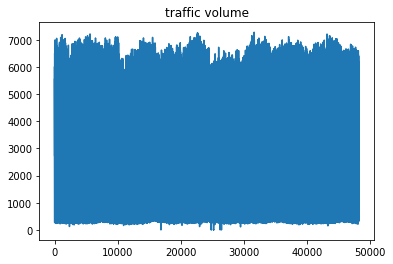

In [10]:
plt.plot(data.traffic_volume)
plt.title("traffic volume")

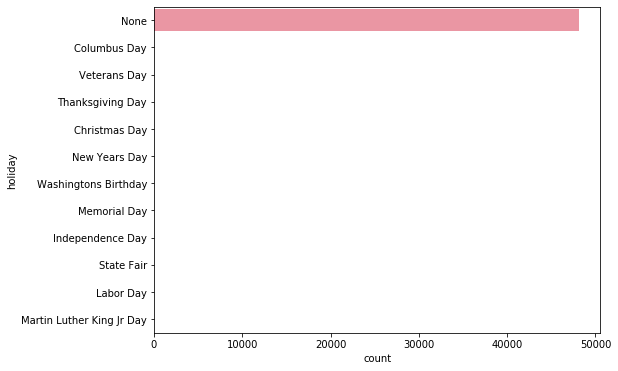

None                         48143
Labor Day                        7
Christmas Day                    6
Thanksgiving Day                 6
New Years Day                    6
Martin Luther King Jr Day        6
Washingtons Birthday             5
Independence Day                 5
Veterans Day                     5
Columbus Day                     5
State Fair                       5
Memorial Day                     5
Name: holiday, dtype: int64

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data = data)
plt.show()  
data["holiday"].value_counts()

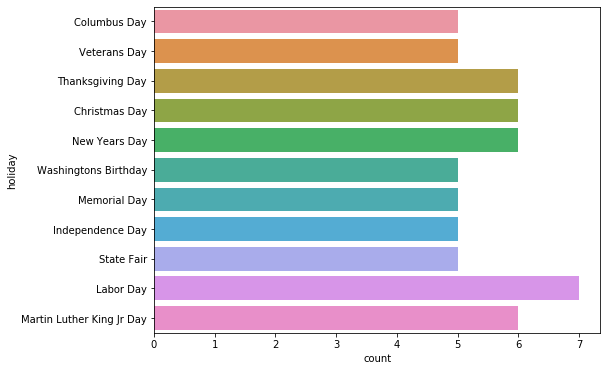

In [12]:
holidays = data.loc[data.holiday != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()

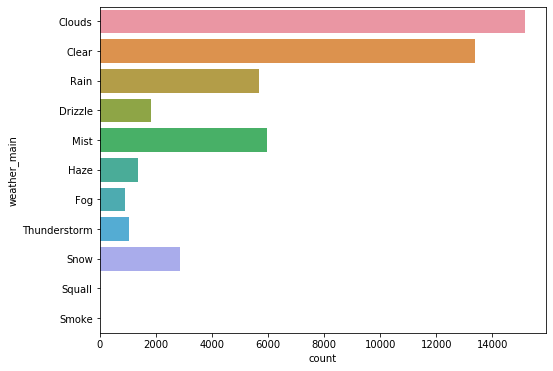

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(y='weather_main', data= data)
plt.show()
data["weather_main"].value_counts()

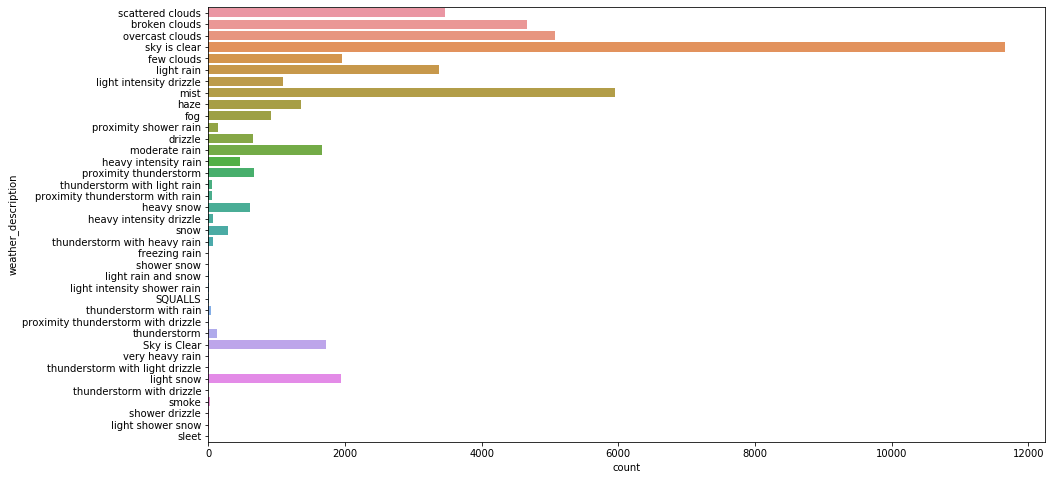

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(y='weather_description', data= data)
plt.show()
data["weather_description"].value_counts()

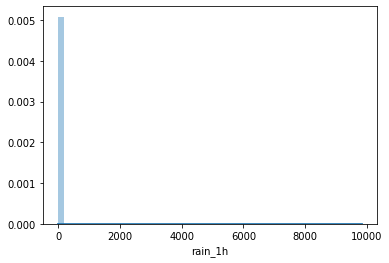

In [15]:
plt.figure(figsize=(6,4))
sns.distplot(data.rain_1h)
plt.show()

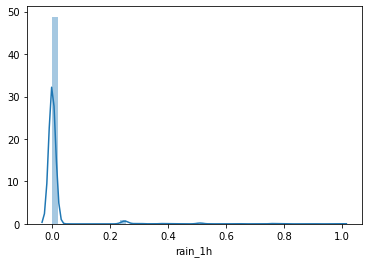

In [16]:
plt.figure(figsize=(6,4))
sns.distplot(data.rain_1h[data.rain_1h<1])
plt.show()

# plt.hist(data_traffic_data.rain_1h.loc[data_traffic_data.rain_1h<1])
# plt.show()

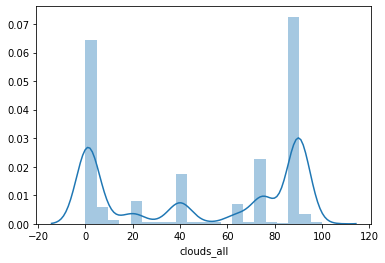

In [17]:
sns.distplot(data.clouds_all)
plt.show()

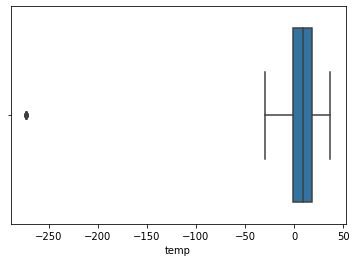

In [18]:
data['temp'] = (data['temp']-273.15)
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = data)
plt.show()

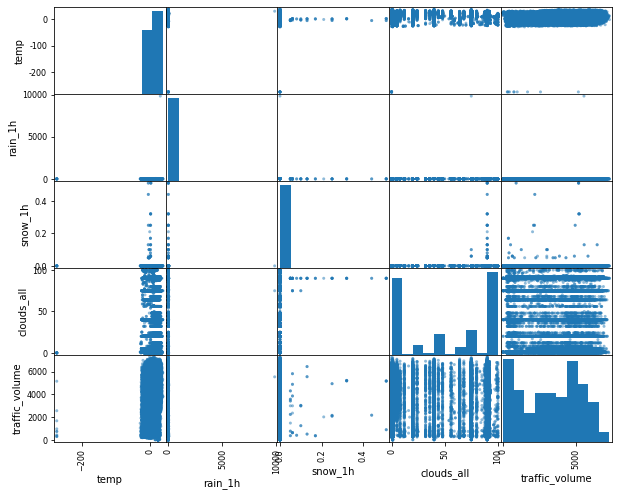

In [19]:
num_vars = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']
from pandas.plotting import scatter_matrix
scatter_matrix(data[num_vars],figsize=(10,8))
plt.show()

In [37]:
exp_date = input("Enter the date and time you wanted to check in this format DD-MM-HH: ")
che_date = "-" + str(exp_date[3:5]) + "-" + str(exp_date[0:2]) + " "
che_time = str(exp_date[6:8]) + ":00:00"
cur_data = data[data['date_time'].str.contains(che_date)]
a_data = cur_data[data['date_time'].str.contains(che_time)]
# print(cur_data, a_data, len(cur_data), len(a_data))

Enter the date and time you wanted to check in this format DD-MM-HH: 12-02-11


In [30]:
ar = {}
#Auto Regression (AR)
model = AutoReg(cur_data['temp'], lags=1)
model_fit = model.fit()
yhat = model_fit.predict(len(cur_data), len(cur_data))
yhat = yhat.tolist()
ar['temp'] = yhat[0]

f = 0
for i in cur_data['rain_1h'].tolist():
    if i != 0:
        f = 1
        break
if f == 1:
    model = AutoReg(cur_data['rain_1h'], lags=1)
    model_fit = model.fit()
    yhat = model_fit.predict(len(cur_data), len(cur_data))
    yhat = yhat.tolist()
    ar['rain_1h'] = yhat[0]
else:
    ar['rain_1h'] = 0

f = 0
for i in cur_data['snow_1h'].tolist():
    if i != 0:
        f = 1
        break
if f == 1:
    model = AutoReg(cur_data['snow_1h'], lags=1)
    model_fit = model.fit()
    yhat = model_fit.predict(len(cur_data), len(cur_data))
    yhat = yhat.tolist()
    ar['snow_1h'] = yhat[0]
else:
    ar['snow_1h'] = 0

model = AutoReg(cur_data['clouds_all'], lags=1)
model_fit = model.fit()
yhat = model_fit.predict(len(cur_data), len(cur_data))
yhat = yhat.tolist()
ar['clouds_all'] = yhat[0]

model = AutoReg(cur_data['traffic_volume'], lags=1)
model_fit = model.fit()
yhat = model_fit.predict(len(cur_data), len(cur_data))
yhat = yhat.tolist()
ar['traffic_volume'] = yhat[0]

In [31]:
ma = {}
#Moving Average (MA)
model = ARMA(cur_data['temp'], order=(0, 1))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(cur_data), len(cur_data))
yhat = yhat.tolist()
ma['temp'] = yhat[0]

f = 0
for i in cur_data['rain_1h'].tolist():
    if i != 0:
        f = 1
        break
if f == 1:
    model = ARMA(cur_data['rain_1h'], order=(0, 1))
    model_fit = model.fit(disp=False)
    yhat = model_fit.predict(len(cur_data), len(cur_data))
    yhat = yhat.tolist()
    ma['rain_1h'] = yhat[0]
else:
    ma['rain_1h'] = 0

f = 0
for i in cur_data['snow_1h'].tolist():
    if i != 0:
        f = 1
        break
if f == 1:
    model = ARMA(cur_data['snow_1h'], order=(0, 1))
    model_fit = model.fit()
    yhat = model_fit.predict(len(cur_data), len(cur_data))
    yhat = yhat.tolist()
    ma['snow_1h'] = yhat[0]
else:
    ma['snow_1h'] = 0


model = ARMA(cur_data['clouds_all'], order=(0, 1))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(cur_data), len(cur_data))
yhat = yhat.tolist()
ma['clouds_all'] = yhat[0]

model = ARMA(cur_data['traffic_volume'], order=(0, 1))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(cur_data), len(cur_data))
yhat = yhat.tolist()
ma['traffic_volume'] = yhat[0]

In [32]:
arima = {}
#Autoregressive Intergrated Moving Average (ARIMA)
model = ARIMA(cur_data['temp'], order=(1, 1, 1))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(cur_data), len(cur_data), typ='levels')
yhat = yhat.tolist()
arima['temp'] = yhat[0]

f = 0
for i in cur_data['rain_1h'].tolist():
    if i != 0:
        f = 1
        break
if f == 1:
    model = ARIMA(cur_data['rain_1h'], order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    yhat = model_fit.predict(len(cur_data), len(cur_data), typ='levels')
    yhat = yhat.tolist()
    arima['rain_1h'] = yhat[0]
else:
    arima['rain_1h'] = 0

f = 0
for i in cur_data['snow_1h'].tolist():
    if i != 0:
        f = 1
        break
if f == 1:
    model = ARIMA(cur_data['rain_1h'], order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    yhat = model_fit.predict(len(cur_data), len(cur_data), typ='levels')
    yhat = yhat.tolist()
    arima['snow_1h'] = yhat[0]
else:
    arima['snow_1h'] = 0

model = ARIMA(cur_data['clouds_all'], order=(1, 1, 1))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(cur_data), len(cur_data), typ='levels')
yhat = yhat.tolist()
arima['clouds_all'] = yhat[0]

model = ARIMA(cur_data['traffic_volume'], order=(1, 1, 1))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(cur_data), len(cur_data), typ='levels')
yhat = yhat.tolist()
arima['traffic_volume'] = yhat[0]

In [33]:
ses = {}
#Simple Exponential Smoothing (SES)
model = SimpleExpSmoothing(cur_data['temp'])
model_fit = model.fit()
yhat = model_fit.predict(len(cur_data), len(cur_data))
yhat = yhat.tolist()
ses['temp'] = yhat[0]

f = 0
for i in cur_data['rain_1h'].tolist():
    if i != 0:
        f = 1
        break
if f == 1:
    model = SimpleExpSmoothing(cur_data['rain_1h'])
    model_fit = model.fit()
    yhat = model_fit.predict(len(cur_data), len(cur_data))
    yhat = yhat.tolist()
    ses['rain_1h'] = yhat[0]
else:
    ses['rain_1h'] = 0
    
f = 0
for i in cur_data['snow_1h'].tolist():
    if i != 0:
        f = 1
        break
if f == 1:
    model = SimpleExpSmoothing(cur_data['snow_1h'])
    model_fit = model.fit()
    yhat = model_fit.predict(len(cur_data), len(cur_data))
    yhat = yhat.tolist()
    ses['snow_1h'] = yhat[0]
else:
    ses['snow_1h'] = 0
    
model = SimpleExpSmoothing(cur_data['clouds_all'])
model_fit = model.fit()
yhat = model_fit.predict(len(cur_data), len(cur_data))
yhat = yhat.tolist()
ses['clouds_all'] = yhat[0]

model = SimpleExpSmoothing(cur_data['traffic_volume'])
model_fit = model.fit()
yhat = model_fit.predict(len(cur_data), len(cur_data))
yhat = yhat.tolist()
ses['traffic_volume'] = yhat[0]

In [34]:
hwes = {}
#Holt Winter's Exponential Smoothing (HWES)
model = ExponentialSmoothing(cur_data['temp'])
model_fit = model.fit()
yhat = model_fit.predict(len(cur_data), len(cur_data))
yhat = yhat.tolist()
hwes['temp'] = yhat[0]

f = 0
for i in cur_data['rain_1h'].tolist():
    if i != 0:
        f = 1
        break
if f == 1:
    model = ExponentialSmoothing(cur_data['rain_1h'])
    model_fit = model.fit()
    yhat = model_fit.predict(len(cur_data), len(cur_data))
    yhat = yhat.tolist()
    hwes['rain_1h'] = yhat[0]
else:
    hwes['rain_1h'] = 0
    
f = 0
for i in cur_data['snow_1h'].tolist():
    if i != 0:
        f = 1
        break
if f == 1:
    model = ExponentialSmoothing(cur_data['snow_1h'])
    model_fit = model.fit()
    yhat = model_fit.predict(len(cur_data), len(cur_data))
    yhat = yhat.tolist()
    hwes['snow_1h'] = yhat[0]
else:
    hwes['snow_1h'] = 0
    
model = ExponentialSmoothing(cur_data['clouds_all'])
model_fit = model.fit()
yhat = model_fit.predict(len(cur_data), len(cur_data))
yhat = yhat.tolist()
hwes['clouds_all'] = yhat[0]

model = ExponentialSmoothing(cur_data['traffic_volume'])
model_fit = model.fit()
yhat = model_fit.predict(len(cur_data), len(cur_data))
yhat = yhat.tolist()
hwes['traffic_volume'] = yhat[0]

In [35]:
print("AutoRegression: ", ar, "\n\nMoving Average: ", ma, "\n\nAutoregressive Integrated Moving Average: ", arima, "\n\nSimple Exponential Smoothing: ", ses, "\n\nHolt Winter's Exponential Smoothing", hwes)

AutoRegression:  {'temp': 21.24422040067501, 'rain_1h': 0.02686242384535712, 'snow_1h': 0, 'clouds_all': 9.959092031692304, 'traffic_volume': 2887.6562521433398} 

Moving Average:  {'temp': 19.52522390231914, 'rain_1h': -0.17682726333609333, 'snow_1h': 0, 'clouds_all': 15.190884387996356, 'traffic_volume': 3530.1390251088155} 

Autoregressive Integrated Moving Average:  {'temp': 21.066032634380704, 'rain_1h': -0.12019122543766556, 'snow_1h': 0, 'clouds_all': 9.878830780881557, 'traffic_volume': 3276.8473900148247} 

Simple Exponential Smoothing:  {'temp': 21.310000013103018, 'rain_1h': 1.6559753103891699e-31, 'snow_1h': 0, 'clouds_all': 2.0247637682777655, 'traffic_volume': 2836.8773451573934} 

Holt Winter's Exponential Smoothing {'temp': 21.310000013103018, 'rain_1h': 1.6559753103891699e-31, 'snow_1h': 0, 'clouds_all': 2.0247637682777655, 'traffic_volume': 2836.8773451573934}


<Figure size 720x576 with 0 Axes>

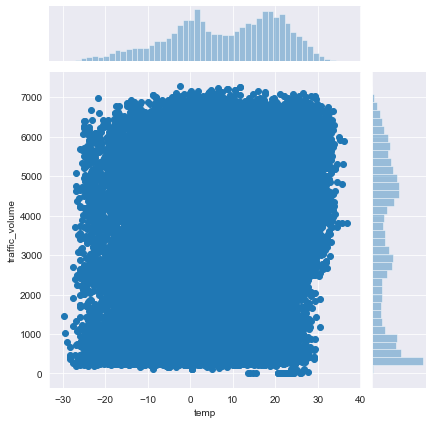

In [34]:
#Temperature vs Traffic
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.jointplot(y='traffic_volume', x='temp', data = data.loc[data.temp>-50])
plt.show()

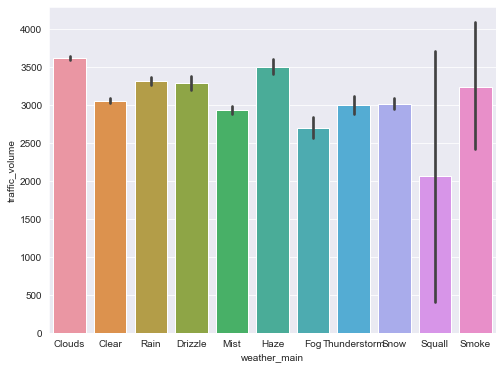

In [35]:
#Weather vs Traffic
plt.figure(figsize=(8,6))
sns.barplot(x='weather_main', y = 'traffic_volume', data = data)
plt.show()

In [36]:
traffic_features = data.copy()
traffic_features['date_time'] = pd.to_datetime(traffic_features.date_time)
traffic_features['weekday'] = traffic_features.date_time.dt.weekday
traffic_features['date'] = traffic_features.date_time.dt.date
traffic_features['hour'] = traffic_features.date_time.dt.hour
traffic_features['month'] = traffic_features.date_time.dt.month
traffic_features['year'] = traffic_features.date_time.dt.year

In [37]:
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18]
    Night = [19,20,21,22]
    Late_Night = [23,24,1,2,3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
traffic_features['hour'] = traffic_features.hour.map(hour_modify)

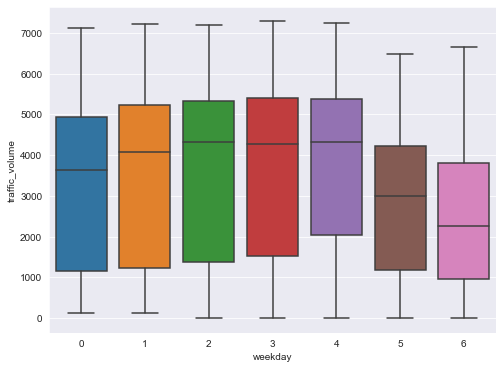

In [38]:
#Traffic vs Weekday
plt.figure(figsize=(8,6))
sns.boxplot(x='weekday', y='traffic_volume', data = traffic_features)
plt.show()

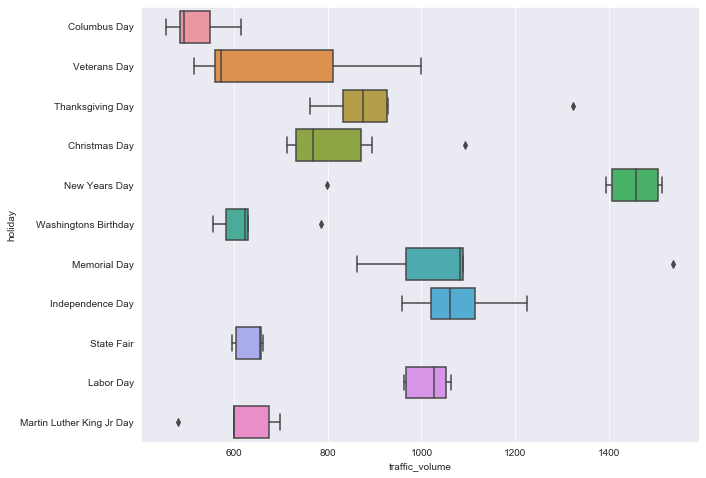

In [39]:
#Holiday vs Traffic
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays)
plt.show()

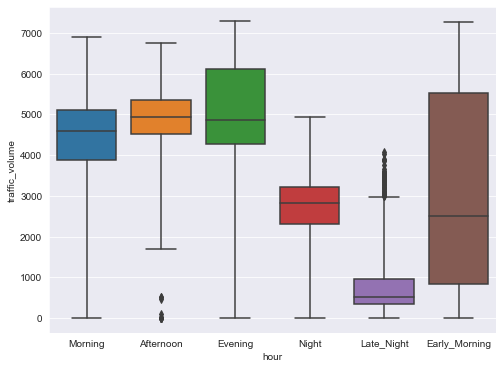

In [52]:
#Traffic vs Hourly
plt.figure(figsize=(8,6))
sns.boxplot(x='hour', y='traffic_volume', data = traffic_features, whis=3.4)
plt.show()